In [ ]:
import numpy as np
import numpy.random as nrand
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import itertools

In [2]:
with open("../5_tRNA_Extrapolation/All_data_df.pkl", 'rb') as f:
    df = pickle.load(f)

In [3]:
gt_list = ['GTTCCGTTAGCGTAATGGTAACGCGTTTCCCTCCTAAGGAGAAGCCTGCGGGTTCGAGTCCCGTACGGAACG',
             'GTTCCGTTAGCGTAATGGTAACGCGTCTCCCTCCTAAGGAGAAGCCTGCGGGTTCGAGTCCCGTACGGAACG',
             'GTTCCGTTGGCGTAATGGTAACGCGTCTCCCTCCTAAGGAGAAGCCTGCGGGTTCGAGTCCCGTACGGAACG',
             'GTTCCGTTGGCGTAATGGTAACGCGTCTCCCTCCTAAGGAGAAGCATGCGGGTTCGAGTCCCGTACGGAACG',
             'GTTCCGTTGGCGTAATGGTAACGCGTCTCCCTCCTAAGGAGAAGAATGCGGGTTCGAGTCCCGTACGGAACG',
             'GTTCCGTTGGCGTAATGGTAGCGCGTCTCCCTCCTAAGGAGAAGAATGCGGGTTCGAGTCCCGTACGGAACG']


example_df = pd.DataFrame(columns=['Pos','Nuc','Fit','FitS1','FitS2', 'FitS3','FitS4', 'FitS5', 'FitS6'])
for gt in gt_list:
    tmp = df[df['Seq'] == gt][['Pos','Nuc','Fit','FitS1','FitS2', 'FitS3',
       'FitS4', 'FitS5', 'FitS6']]
    example_df = pd.concat([example_df, tmp])

In [4]:
example_df['mean'] = np.mean(example_df.iloc[:,3:],axis=1)

Text(0, 0.5, 'Fitness')

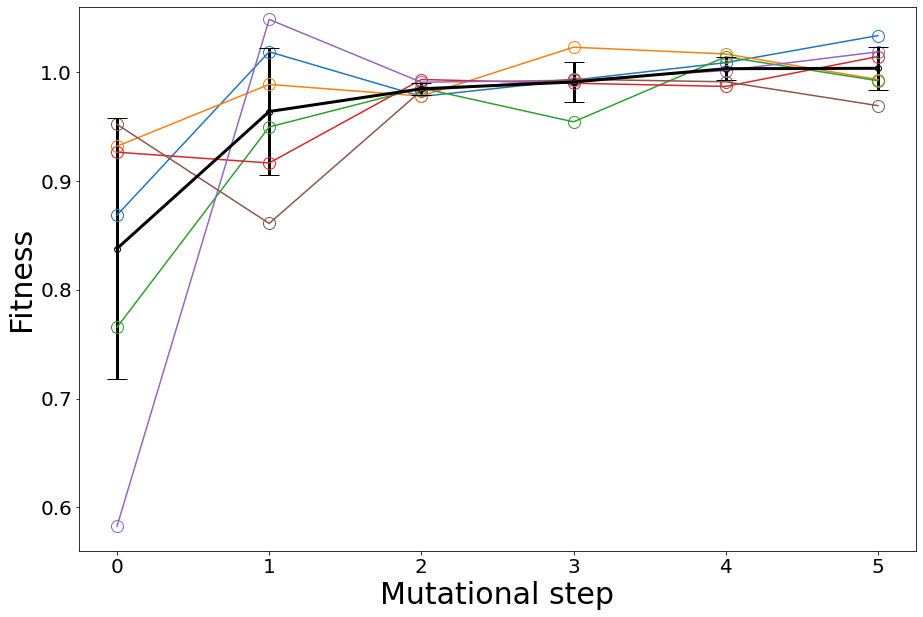

In [5]:
yerr = np.std(example_df.iloc[:,3:],axis=1)
plt.figure(figsize=(15,10))
x = [0,1,2,3,4,5]
plt.ylim(0.56,1.06)
for i in range(1,7):
    plt.plot(x, example_df[f'FitS{i}'],'o-',fillstyle='none',markersize=12)
plt.errorbar(x, example_df['mean'], yerr=yerr, fmt='-o',capsize=10,color='black',lw=3,fillstyle='none')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Mutational step',size=30)
plt.ylabel('Fitness',size=30)